<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Day 4) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Chi-Square Test](#chisq)**
    - 2.1 - **[Chi-Square Test for Goodness of Fit](#goodness)**
    - 2.2 - **[Chi-Square Test for Independence](#ind)**
    - 2.3 - **[Chi-Square Test for Equality of Variance](#var)**
3. **[One-way ANOVA](#1way)**
    - 3.1 - **[Post-hoc Analysis](#post-hoc)**
4. **[Equivalent Non-parametric Test](#non-para)**
5. **[Two-way ANOVA](#2way)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="chisq"></a>
# 2. Chi-Square Test

It is a non-parametric test. `Non-parametric tests` do not require any assumptions on the parameter of the population from which the sample is taken. These tests can be applied to the ordinal/ nominal data. A non-parametric test can be performed on the data containing outliers.

The chi-square test statistic follows a Chi-square ($\chi^{2}$) distribution under the null hypothesis. It can be used to check the relationship between the categorical variables. 

Let us calculate the right-tailed $\chi^{2}$ values for different levels of significance ($\alpha$).

In [3]:
# let us find the χ2-values for different alpha values with 10 degrees of freedom

# create an empty dataframe to store the alpha and corresponding χ2-value
df_χ2 = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.25, 0.1, 0.05, 0.01] 

# use for loop to calculate the χ2-value for each alpha value
for i in range(len(alpha)):
    
    # use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha' to the parameter 'q'
    # pass the 10 degrees of freedom to the parameter 'df' 
    # use 'round()' to round-off the value to 2 digits
    chi_sq = np.abs(round(stats.chi2.isf(q = alpha[i], df = 10), 2))

    # create a dataframe using dictionary to store the alpha and corresponding χ2-value
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "χ2": chi_sq}, index = [i])

    # append the row to the dataframe 'df_χ2'
    df_χ2 = df_χ2.append(row)

# print the final dataframe
df_χ2

,alpha,χ2
0,0.25,12.55
1,0.10,15.99
2,0.05,18.31
3,0.01,23.21


Let us study the following tests:<br>
$\bullet$ Chi-square test for goodness of fit<br>
$\bullet$ Chi-square test for independence<br>
$\bullet$ Chi-square test for equality of variance

<a id="goodness"></a>
## 2.1 Chi-Square Test for Goodness of Fit

This test is used to compare the distribution of the categorical data with the expected distribution. 

<p style='text-indent:6em'> <strong> $H_{0}$: There is no significant difference between the observed and expected frequencies from the expected distribution</strong></p>
<p style='text-indent:6em'> <strong> $H_{1}$: There is a significant difference between the observed and expected frequencies from the expected distribution</strong></p>

The test statistic is given as:
<p style='text-indent:25em'> <strong> $\chi^{2} = \sum_{i = 1}^{k}\frac{O_{i}^{2}}{E_{i}} - N$</strong></p>

Where, <br>
$O_{i}$: Observed frequency for category i <br>
$E_{i}$: Expected frequency for category i<br>
$N$: Total number of observations

Under $H_{0}$, the test statistic follows a chi-square distribution with $(k - p - 1)$ degrees of freedom, where k is the number class frequencies and p is the number of estimated parameters. 

**Note:** All the expected frequencies should be greater than or equal to 5. If not, add the classes such that each class will have a frequency greater than or equal to 5.

### Example:

#### 1. Check whether there is a significant difference between the observed and expected education values or not with 90% confidence. 

Consider the observed values from the performance dataset of students available in the CSV file `students_data.csv`. Consider the expected values from the demographic data given in the CSV file `demographic_data.csv`.

In [4]:
# read the students performance data 
df_student = pd.read_csv('students_data.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning


In [5]:
# read the demographic data 
df_demographic = pd.read_csv('demographic_data.csv')

# display the first two observations
df_demographic.head(2)

,education
0,bachelor's degree
1,college


The null and alternative hypothesis is:

H<sub>0</sub>: There is no significant difference between the observed and expected values. <br>
H<sub>1</sub>: There is a significant difference between the observed and expected values.

Calculate the observed values using the dataframe `df_student`.

In [6]:
# use 'value_counts()' to calculate the count for each category in the variable 'education' 
observed_value = df_student['education'].value_counts()

# observed values
observed_value

college               225
associate's degree    222
high school           197
Ph.D.                 179
bachelor's degree     118
master's degree        59
Name: education, dtype: int64

Now let us calculate the expected values using the dataframe `df_demographic`. The dataframe represents the population of the  education level of a student.

In [7]:
# use 'value_counts()' to calculate the count for each category in the variable 'education' 
exp_count = df_demographic['education'].value_counts()

# count of each category
exp_count

college               1250
associate's degree    1200
high school           1100
Ph.D.                 1050
bachelor's degree      940
master's degree        600
Name: education, dtype: int64

In [8]:
# calculate the expected values for each category
# multiply the count by sample size and divide it by total number of observations in the population
expected_value = (exp_count * len(df_student)) / len(df_demographic)

In [9]:
# create a list of observed values
print("Observed Values: ", list(observed_value))

# create a list of expected values
print("Expected Values: ", list(expected_value))

Observed Values:  [225, 222, 197, 179, 118, 59]
Expected Values:  [203.5830618892508, 195.43973941368077, 179.1530944625407, 171.0097719869707, 153.09446254071662, 97.71986970684038]


For ⍺ = 0.1 and degrees of freedom = 5, calculate the critical value.

In [10]:
# calculate the χ2-value for 90% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.1
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.1, df = 5), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 9.2364


i.e. if the chi-square value is greater than 9.2364 then we reject the null hypothesis.

In [11]:
# use the 'chisquare()' to perform the goodness of fit test
# the function returns the test statistic value and corresponding p-value
# pass the observed values to the parameter, 'f_obs'
# pass the expected values to the parameter, 'f_exp'
test_stat, p_value = chisquare(f_obs = observed_value, f_exp = expected_value)

print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 31.400760035000467
p-value: 7.8061673788274e-06


The above output shows that the chi-square test statistic is greater than 9.2364 and the p-value is less than 0.1, thus, we reject the null hypothesis and conclude that there is a significant difference between the observed and expected values.

Let us plot the acceptance and rejection region for a test with 90% confidence.

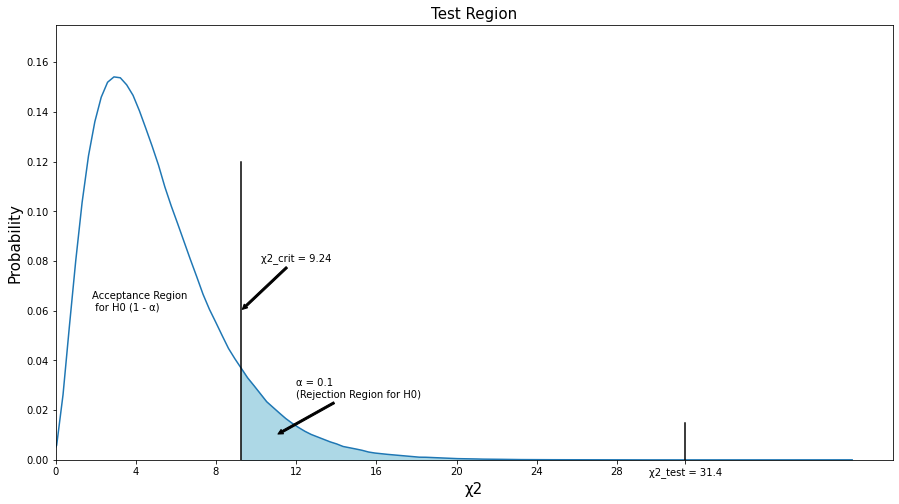

In [12]:
# consider a random variable 'X' that follows a chi-square distribution 
# pass the degrees of freedom to the parameter 'df' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.chi2.rvs(df = 5, size = 1000000, random_state = 4)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.175)

# set the left side limit for x-axis
plt.xlim(0)

# use 'stats.chi2.isf()' to calculate the critical value for alpha = 0.1
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom to the parameter 'df' 
chi2 = stats.chi2.isf(q = 0.1, df = 5)

# plot a vertical line at χ2-value
x, y = [chi2, chi2], [0, 0.12]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2 test value
x, y = [test_stat, test_stat], [0, 0.015]
plt.plot(x, y, color = 'black')

# add the color to the right of the χ2-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical χ2-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= chi2], y1[x1 >= chi2], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.1\n(Rejection Region for H0)', xy = (11, 0.01), xytext = (12, 0.025), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'χ2_crit = '+ str(round(chi2,2)), xy = (chi2, 0.06), xytext = (chi2+1, 0.08), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 1.8, y = 0.06, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [0, 4, 8, 12, 16, 20, 24, 28, round(test_stat,2)], 
           labels = [0, 4, 8, 12, 16, 20, 24, 28, 'χ2_test = '+str(round(test_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('χ2', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the rejection region, which implies that we reject $H_{0}$.

#### 2. At an emporium, the manager is interested in knowing the age group which visits the mall during the day. He defines categories as - children, teenagers, adults and senior citizens. He plans to have his inventory of goods accordingly. He claims that out of all the people who visited 5% are children, 38% are teenagers, 2% are senior citizens are remaining are adults. From a sample of 180 people, it was seen that 25 were children, 50 were teenagers, 90 were adults and  15 were senior citizens. Test the manager’s claim at a 95% confidence level.


The null and alternative hypothesis is:

H<sub>0</sub>: The manager's claim is correct <br>
H<sub>1</sub>: The manager's claim is not correct

For ⍺ = 0.05 and degrees of freedom = 3, calculate the critical value.

In [13]:
# calculate the χ2-value for 90% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.1
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 3), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 7.8147


i.e. if the chi-square value is greater than 7.8147 then we reject the null hypothesis.

In [14]:
# given observed values
observed_value = [25, 50, 90, 15]

# expected count 
exp_count = [0.05, 0.38, 0.55, 0.02]

# calculate the expected values for each category
# expected_value = (np.array(exp_count) * 180) 
expected_value = [9, 68, 99, 4]

# use the 'chisquare()' to perform the goodness of fit test
# the function returns the test statistic value and corresponding p-value
# pass the observed values to the parameter, 'f_obs'
# pass the expected values to the parameter, 'f_exp'
stat, p_value = chisquare(f_obs = observed_value, f_exp = expected_value)

print('Test statistic:', stat)
print('p-value:', p_value)

Test statistic: 64.2773321449792
p-value: 7.160266387019384e-14


The above output shows that the chi-square test statistic is greater than 7.8147 and the p-value is less than 0.05. Thus, we reject the null hypothesis and conclude that manager's claim is not correct.

<a id="ind"></a>
## 2.2 Chi-Square Test for Independence

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

Consider a categorical variable `A` with `r` levels and variable `B` with `c` levels. Let us test the independence of variables A and B.

The test statistic is given as:
<p style='text-indent:25em'> <strong> $\chi^{2} = \sum_{i= 1}^{r}\sum_{j = 1}^{c}\frac{O_{ij}^{2}}{E_{ij}} - N$</strong></p>

Where, <br>
$O_{ij}$: Observed frequency for category (i,j) <br>
$E_{ij}$: Expected frequency for category (i,j)<br>
$N$: Total number of observations

Under $H_{0}$, the test statistic follows a chi-square distribution with $(r-1)(c-1)$ degrees of freedom.

### Example:

#### 1. Check if there is any relationship between the gender and education level of students with 95% confidence. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [15]:
# read the students performance data 
df_student = pd.read_csv('students_data.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning


The null and alternative hypothesis is:

H<sub>0</sub>: The variables gender and education are independent<br>
H<sub>1</sub>: The variables gender and education are not independent

In [16]:
# use 'crosstab()' to create a table for each education level and corresponding gender count 
table = pd.crosstab(df_student['gender'], df_student['education'])

# observed values  
observed_value = table.values
observed_value

array([[ 91, 116,  63, 117,  94,  36],
       [ 88, 106,  55, 108, 103,  23]], dtype=int64)

For ⍺ = 0.05 and degrees of freedom = 5, calculate the critical value.

In [17]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 5), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 11.0705


i.e. if the chi-square value is greater than 11.0705 then we reject the null hypothesis.

In [18]:
# use the 'chi2_contingency()' to check the independence of variables
# the function returns the test statistic value, corresponding p-value, degrees of freedom of the test and expected values
# pass the observed values to the parameter, 'observed'
# 'correction = False' will not apply the Yates' correction
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 3.5267538812534243
p-value: 0.6193433487137843
Degrees of freedom: 5
Expected values: [[ 92.543 114.774  61.006 116.325 101.849  30.503]
 [ 86.457 107.226  56.994 108.675  95.151  28.497]]


The above output shows that the chi-square test statistic is less than 11.0705 and the p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables `gender` and `education` are independent.

Let us plot the acceptance and rejection region for a test with 95% confidence.

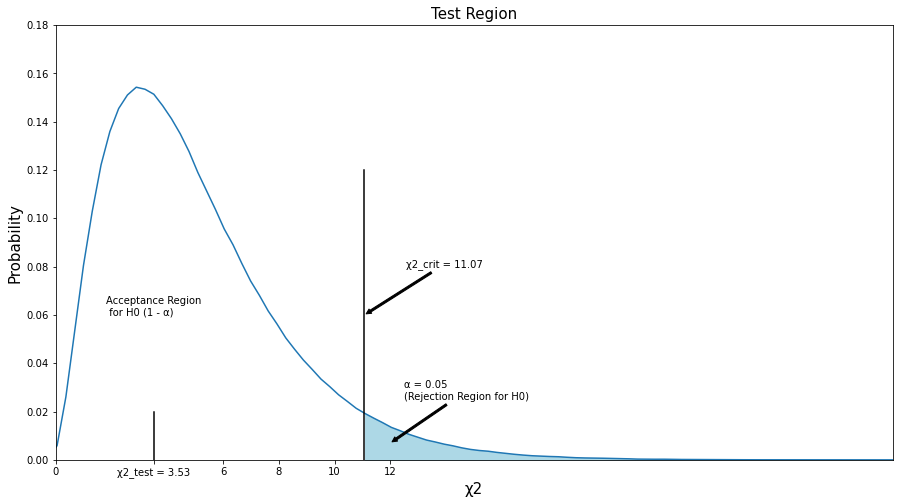

In [19]:
# consider a random variable 'X' that follows a chi-square distribution 
# pass the degrees of freedom to the parameter 'df' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.chi2.rvs(df = 5, size = 1000000, random_state = 12)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.18)

# set the limit for x-axis
plt.xlim(0, 30)

# use 'stats.chi2.isf()' to calculate the critical value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom to the parameter 'df' 
chi2 = stats.chi2.isf(q = 0.05, df = 5)

# plot a vertical line at χ2-value
x, y = [chi2, chi2], [0, 0.12]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2 test value
x, y = [test_stat, test_stat], [0, 0.02]
plt.plot(x, y, color = 'black')

# add the color to the right of the χ2-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical χ2-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= chi2], y1[x1 >= chi2], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (12, 0.007), xytext = (12.5, 0.025), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'χ2_crit = '+ str(round(chi2,2)), xy = (chi2, 0.06), xytext = (chi2+1.5, 0.08), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 1.8, y = 0.06, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [0, 6, 8, 10, 12, round(test_stat,2)], 
           labels = [0, 6, 8, 10, 12, 'χ2_test = '+str(round(test_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('χ2', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, which implies that we fail to reject (i.e. accept) $H_{0}$.

#### 2. A study was conducted to test the effect of the malaria parasite - plasmodium falciparum - on heterozygous and homozygous humans. The vaccine was given to a cohort of 252 humans. Test whether the heterozygous humans are better protected than homozygous. Consider 0.05 as a level of significance.

<img src='chi2_ind.png'>

The null and alternative hypothesis is:

H<sub>0</sub>: The zygote type and infection with malaria parasite is independent<br>
H<sub>1</sub>: The zygote type and infection with malaria parasite is not independent

In [20]:
# observed values  
observed_value = np.array([[93, 51], [68, 40]])

For ⍺ = 0.05 and degrees of freedom = 1, calculate the critical value.

In [21]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 1), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 3.8415


i.e. if the chi-square value is greater than 3.8415 then we reject the null hypothesis.

In [22]:
# use the 'chi2_contingency()' to check the independence of variables
# the function returns the test statistic value, corresponding p-value, degrees of freedom of the test and expected values
# pass the observed values to the parameter, 'observed'
# 'correction = False' will not apply the Yates' correction
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

# print the output
print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 0.07023411371237459
p-value: 0.790996215494177
Degrees of freedom: 1
Expected values: [[92. 52.]
 [69. 39.]]


The above output shows that the chi-square test statistic is less than 3.8415 and the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and conclude that the zygote type and infection of the malaria parasite are independent.

<a id="var"></a>
## 2.3 Chi-Square Test for Equality of Variance

This test is used to test whether the population variance ($\sigma^{2}$) is equal to a specific value ($\sigma_{0}^{2}$). Consider that the population mean ($\mu$) is known.

<p style='text-indent:20em'> <strong> $H_{0}$: $\sigma^{2} = \sigma^{2}_{0}$ or $\sigma^{2} \geq \sigma^{2}_{0}$ or $\sigma^{2} \leq \sigma^{2}_{0}$  </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: $\sigma^{2} \neq \sigma^{2}_{0}$ or $\sigma^{2} < \sigma^{2}_{0}$ or $\sigma^{2} > \sigma^{2}_{0}$  </strong></p>

The test statistic is given as:
<p style='text-indent:25em'> <strong> $\chi^{2} = \frac{\sum_{i= 1}^{n}(x_{i} - \mu)^{2}}{\sigma_{0}^{2}}$</strong></p>

Where, <br>
$\mu$: Population mean<br>
$n$: Sample size

Under $H_{0}$, the test statistic follows a chi-square distribution with $n$ degrees of freedom.

If the population mean ($\mu$) is unknown, use sample mean ($\bar{x}$) instead of $\mu$. In this case, the test statistic follows a chi-square distribution with $n-1$ degrees of freedom.

### Example:

#### 1. The state board of studies has a record of marks for all the students. The committee of basic sciences wants to check if the variance in the mathematics score is 130 or not. A sample of 55 students is collected from two different institutes. Perform a two-tailed chi-square test with a 5% level of significance.

Use the dataset of students available in the CSV file `chisq_var.csv`.

In [23]:
# read the students performance data 
df_student = pd.read_csv('chisq_var.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group C,associate's degree,free/reduced,none,76,65,80,221,Nature Learning
1,male,group D,high school,standard,none,63,71,51,185,Nature Learning


The null and alternative hypothesis is:

H<sub>0</sub>: $\sigma^{2} = 130$<br>
H<sub>1</sub>: $\sigma^{2} \neq 130$

In [24]:
# hypothesized variance
sig_2 = 130

# sample size
n = len(df_student)

# the population mean is unknown, use sample mean
samp_mean = np.mean(df_student['math_score'])

# degrees of freedom
print('Degrees of freedom:', n-1)

Degrees of freedom: 54


As chi-square distribution is not symmetric, we calculate the critical value for the left and right tail separately for a two-tailed test.

For ⍺ = 0.05 and degrees of freedom = 54, calculate the critical value for the left-tail.

In [25]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.ppf()' to find the χ2-value corresponding to the lower tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q', for left-tail
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val_left = np.abs(round(stats.chi2.ppf(q = 0.05/2, df = 54), 4))

print('Critical value for chi-square test:', chi2_val_left)

Critical value for chi-square test: 35.5863


i.e. if the chi-square value is less than 35.5863 then we reject the null hypothesis.

For ⍺ = 0.05 and degrees of freedom = 54, calculate the critical value for the right-tail.

In [26]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.ppf()' to find the χ2-value corresponding to the lower tail probability 'q'
# pass the value of '1 - alpha/2' to the parameter 'q', for right-tail
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val_right = np.abs(round(stats.chi2.ppf(q = (1 - 0.05/2), df = 54), 4))

print('Critical value for chi-square test:', chi2_val_right)

Critical value for chi-square test: 76.192


i.e. if the chi-square value is greater than 76.192 then we reject the null hypothesis.

In [27]:
# calculate the test statistic
chi_test = (np.sum((df_student['math_score'] - samp_mean)**2)) / sig_2

# print the test statistic
print('Test Statistic:', chi_test)

Test Statistic: 59.87636363636363


In [28]:
# calculate P(X > chi_test)
# pass the test statistic value to 'x'
# pass the degrees of freedom to 'df'
p_val = stats.chi2.sf(x = chi_test, df = 54)

# print the p-value
print('p-value:', p_val)

p-value: 0.27099758895862275


The above output shows that the chi-square test statistic is less than 76.192 and greater than 35.5863, the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and conclude that the population variance is not equal to 130.

Let us plot the acceptance and rejection region for a test with 95% confidence.

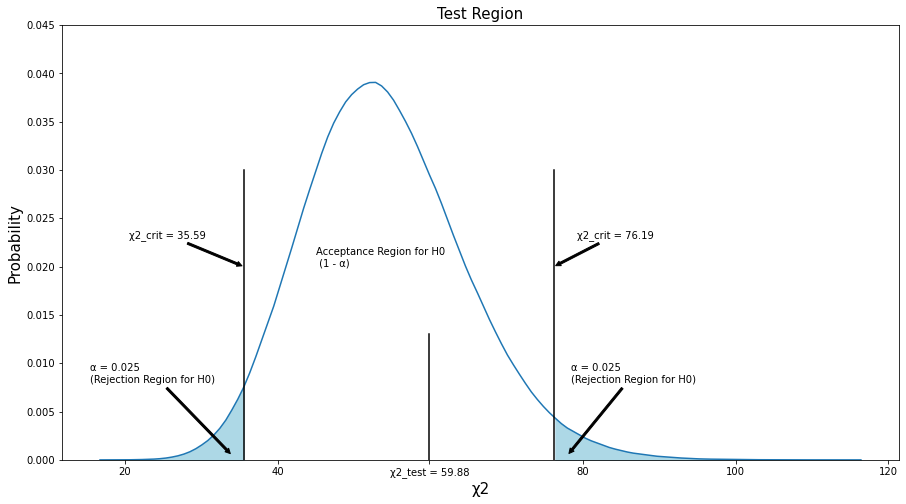

In [29]:
# consider a random variable 'X' that follows a chi-square distribution 
# pass the degrees of freedom to the parameter 'df' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.chi2.rvs(df = 54, size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.045)

# plot a vertical line at χ2-value for right-tail
x, y = [chi2_val_right, chi2_val_right], [0, 0.03]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2-value for left-tail
x, y = [chi2_val_left, chi2_val_left], [0, 0.03]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2 test value
x, y = [chi_test, chi_test], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the χ2-value for right-tail and left of the χ2-value for left-tail
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical χ2-value for right-tail
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= chi2_val_right], y1[x1 >= chi2_val_right], color = 'lightblue')

# fill the color for the region where x-values are less than the critical χ2-value for left-tail
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= chi2_val_left], y1[x1 <= chi2_val_left], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.025\n(Rejection Region for H0)', xy = (78, 0.0005), xytext = (78.5, 0.008), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α = 0.025\n(Rejection Region for H0)', xy = (34, 0.0005), xytext = (15.5, 0.008), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'χ2_crit = '+ str(round(chi2_val_right,2)), xy = (chi2_val_right, 0.02), xytext = (chi2_val_right+3, 0.023), 
            arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'χ2_crit = '+ str(round(chi2_val_left,2)), xy = (chi2_val_left, 0.02), xytext = (chi2_val_left-15, 0.023), 
            arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 45, y = 0.02, s = 'Acceptance Region for H0 \n (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [20, 40, 80, 100, 120, round(chi_test,2)], 
           labels = [20, 40, 80, 100, 120, 'χ2_test = '+str(round(chi_test,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('χ2', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, which implies that we fail to reject (i.e. accept) $H_{0}$.

#### 2. At a dairy, the milk is usually supplied in bottles. The manager does not want to exceed the variance of litres of milk cans to 0.26 squarelitres. Some of  the following data gives the litres of milk in the cans. Write the null and the alternative hypothesis. Test whether the variance of litres of milk cans is more than 0.26 squarelitres at 5% level of significance.

Given data:

        milk_lit = [1.5, 1.3, 1.5, 1.5, 1.4, 1.7, 1.6, 1.2]

The null and alternative hypothesis is:

H<sub>0</sub>: $\sigma^{2} \leq 0.26$<br>
H<sub>1</sub>: $\sigma^{2} > 0.26$

In [30]:
# given data
milk_lit = [1.5, 1.3, 1.5, 1.5, 1.4, 1.7, 1.6, 1.2]

# hypothesized variance
sig_2 = 0.26

# sample size
n = len(milk_lit)

# the population mean is unknown, use sample mean
samp_mean = np.mean(milk_lit)

# degrees of freedom
print('Degrees of freedom:', n-1)

Degrees of freedom: 7


For ⍺ = 0.05 and degrees of freedom = 7, calculate the critical value for the right-tail.

In [31]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of '1 - alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 1 - 0.05, df = 7), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 2.1673


i.e. if the chi-square value is greater than 2.1673 then we reject the null hypothesis.

In [32]:
# calculate the test statistic
chi_test = (np.sum((milk_lit - samp_mean)**2)) / sig_2

# print the test statistic
print('Test Statistic:', chi_test)

Test Statistic: 0.6875


In [33]:
# calculate P(X > chi_test)
# pass the test statistic value to 'x'
# pass the degrees of freedom to 'df'
p_val = stats.chi2.sf(x = chi_test, df = 7)

# print the p-value
print('p-value:', p_val)

p-value: 0.998429948137378


The above output shows that the chi-square test statistic is less than 2.1673, the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variance of litres of milk cans is less than 0.26 squarelitres.

<a id="1way"></a>
# 3. One-way ANOVA

It is used to check the equality of population means for more than two independent samples. Each group is considered as a `treatment`. It assumes that the samples are taken from normally distributed populations. To check this assumption we can use the `Shapiro-Wilk Test.` Also, the population variances should be equal; this can be tested using the `Levene's Test`.

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all treatments are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one treatment has a different average. </strong></p>

Consider there are `t` treatments and `N` number of total observations. The test statistic is given as:
<p style='text-indent:28em'> <strong> $F = \frac{MTrSS}{MESS} $</strong></p>

Where,<br>
MTrSS = $\frac{TrSS}{df_{Tr}}$<br>

TrSS = $\sum_{i}^{t}\sum_{j}^{n_{i}}n_{i}(\bar{x_{i}}. - \bar{x}..)$<br> $n_{i}$ is the number of observations in $i^{th}$ treatment. <br>$\bar{x_{i}}.$ is the mean over $i^{th}$ treatment <br> $\bar{x}..$ is the grand mean (i.e. mean of all the observations). <br>

$df_{Tr}$ is the degrees of freedom for treatments (= $t-1$)

MESS = $\frac{ESS}{df_{e}}$<br>

ESS = $\sum_{i}^{t}\sum_{j}^{n_{i}}{(x_{ij} - \bar{x_{i}}.)}^{2}$

$df_{e}$ is the degrees of freedom for error (= $N-t$)

Under $H_{0}$, the test statistic follows F-distribution with ($t-1,  N-t$) degrees of freedom.

Let us calculate the F values for different levels of significance ($\alpha$).

In [34]:
# let us find the F-values for different alpha values with (10,10) degrees of freedom

# create an empty dataframe to store the alpha and corresponding F-value
df_F = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.25, 0.1, 0.05, 0.01] 

# use for loop to calculate the F-value for each alpha value
for i in range(len(alpha)):
    
    # use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha' to the parameter 'q'
    # pass the (10,10) degrees of freedom to the parameter 'dfn' and 'dfd' respectively
    # use 'round()' to round-off the value to 2 digits
    f_val = np.abs(round(stats.f.isf(q = alpha[i], dfn = 10, dfd = 10), 2))

    # create a dataframe using dictionary to store the alpha and corresponding F-value
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "F": f_val}, index = [i])

    # append the row to the dataframe 'df_F'
    df_F = df_F.append(row)

# print the final dataframe
df_F

,alpha,F
0,0.25,1.55
1,0.10,2.32
2,0.05,2.98
3,0.01,4.85


### Example:

#### 1. Total marks in aptitude exam are recorded for students with different race/ethnicity. Test whether all the races/ethnicities have an equal average score with 0.05 level of significance. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [35]:
# read the students performance data 
df_student = pd.read_csv('students_data.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning


The null and alternative hypothesis is:

H<sub>0</sub>: The average score of all races/ethnicities is same<br>
H<sub>1</sub>: At least one race/ethnicity has a different average score

In [36]:
# unique race/ethnicity in the data
df_student['ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

There are total 5 unique race/ethnicity in the dataset.

In [37]:
# given data
# total marks of students from group A
gr_A = df_student[df_student['ethnicity'] == 'group A']['total_score']

# total marks of students from group B
gr_B = df_student[df_student['ethnicity'] == 'group B']['total_score']

# total marks of students from group C
gr_C = df_student[df_student['ethnicity'] == 'group C']['total_score']

# total marks of students from group D
gr_D = df_student[df_student['ethnicity'] == 'group D']['total_score']

# total marks of students from group E
gr_E = df_student[df_student['ethnicity'] == 'group E']['total_score']

Plot the distribution for each group to compare the means.

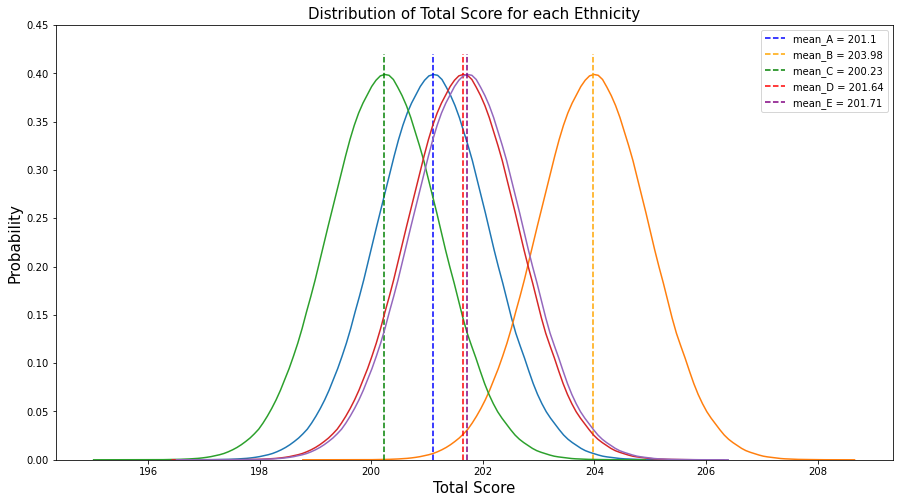

In [38]:
# consider a random variable 'X_A' that follows a normal distribution with mean score of group A 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_A = stats.norm.rvs(loc = gr_A.mean(), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_A, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [gr_A.mean(), gr_A.mean()], [0, 0.42]
plt.plot(x, y, color = 'blue', linestyle = '--', label = 'mean_A = ' + str(round(gr_A.mean(),2)))

# set the legend
plt.legend()

# consider a random variable 'X_B' that follows a normal distribution with mean score of group B
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_B = stats.norm.rvs(loc = gr_B.mean(), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_B, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [gr_B.mean(), gr_B.mean()], [0, 0.42]
plt.plot(x, y, color = 'orange', linestyle = '--', label = 'mean_B = ' + str(round(gr_B.mean(),2)))

# set the legend
plt.legend()

# consider a random variable 'X_C' that follows a normal distribution with mean score of group C
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_C = stats.norm.rvs(loc = gr_C.mean(), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_C, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [gr_C.mean(), gr_C.mean()], [0, 0.42]
plt.plot(x, y, color = 'green', linestyle = '--', label = 'mean_C = ' + str(round(gr_C.mean(),2)))

# set the legend
plt.legend()

# consider a random variable 'X_D' that follows a normal distribution with mean score of group D
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_D = stats.norm.rvs(loc = gr_D.mean(), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_D, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [gr_D.mean(), gr_D.mean()], [0, 0.42]
plt.plot(x, y, color = 'red', linestyle = '--', label = 'mean_D = ' + str(round(gr_D.mean(),2)))

# set the legend
plt.legend()

# consider a random variable 'X_E' that follows a normal distribution with mean score of group E
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_E = stats.norm.rvs(loc = gr_E.mean(), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_E, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [gr_E.mean(), gr_E.mean()], [0, 0.42]
plt.plot(x, y, color = 'purple', linestyle = '--', label = 'mean_E = ' + str(round(gr_E.mean(),2)))

# set the legend
plt.legend()

# set the limit for y-axis
plt.ylim(0, 0.45)

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Total Score', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Distribution of Total Score for each Ethnicity', fontsize = 15)

# display the plot
plt.show()

We can see that the sample means for each race/ethnicity are close to each other, which suggests that the null hypothesis is true (i.e. the average score of all ethnicities is same).

#### Perform ANOVA to test the equality of means.

Let us check the normality of the total marks of students from all the groups.

In [39]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total marks of students 
stat, p_value = stats.shapiro(df_student['total_score'])

# print the p-value
print('p-value:', p_value)

p-value: 0.7420849204063416


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the total marks of students from each group are normally distributed. Thus the assumption of normality is satisfied.

Let us check the equality of variances.

In [40]:
# perform Levene's test for the equality of variances 
# levene() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total scores of students from each group
stat, p_value = stats.levene(gr_A, gr_B, gr_C, gr_D, gr_E)

# print the p-value 
print('P-Value:', p_value)

P-Value: 0.12649444001357793


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal for all the samples.

In [41]:
# obtain number of unique ethnicities
t = df_student['ethnicity'].nunique()
print('t:', t)

# calculate the number of students in each ethnicity
# consider the total number of students in all ethnicities
N = df_student['ethnicity'].value_counts().sum()
print('N:', N)

t: 5
N: 1000


For ⍺ = 0.05 and degrees of freedom (= t-1, N-t) = (4, 995), calculate the critical value.

In [42]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom (= 4) to the parameter 'dfn' 
# pass the degrees of freedom (= 995) to the parameter 'dfd' 
# use 'round()' to round-off the value to 4 digits
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 4, dfd = 995), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 2.3809


i.e. if the test statistic value is greater than 2.3809 then we reject the null hypothesis.

In [43]:
# perform one-way ANOVA
# pass the given data
f_test, p_val = stats.f_oneway(gr_A, gr_B, gr_C, gr_D, gr_E)

# print the test statistic and corresponding p-value
print('Test statistic:', f_test)
print('p-value:', p_val)

Test statistic: 0.789109595922189
p-value: 0.5322937031083035


We can also use the `anova_lm()` in statsmodels library to perform ANOVA.

In [44]:
# perform one-way ANOVA

# fit an ols model on the datafreme 'df_student' 
# use 'Q()' to quote the variable name 
# use 'fit()' to fit the linear model
test = ols('total_score ~ Q("ethnicity")', df_student).fit()

# create table for one-way ANOVA test
# pass the linear model 'test'
# 'typ = 1' performs two-way ANOVA
anova_1 = anova_lm(test, typ = 1)

# print the table
anova_1

,df,sum_sq,mean_sq,F,PR(>F)
"Q(""ethnicity"")",4.0,1699.671655,424.917914,0.78911,0.532294
Residual,995.0,535785.303345,538.477692,NaN,NaN


The above output shows that the test statistic is less than 2.3809 and the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and conclude that the average score of all races/ethnicities is the same.

Let us plot the acceptance and rejection region for a test with 95% confidence.

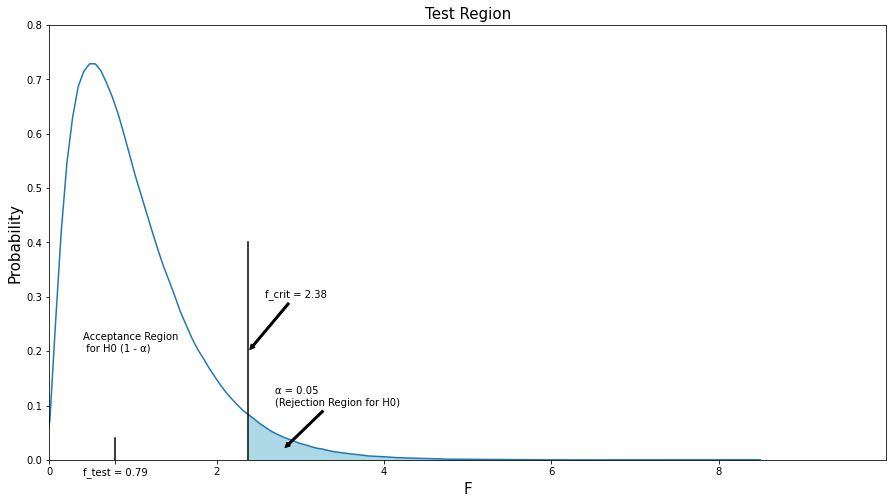

In [45]:
# consider a random variable 'X' that follows a F distribution 
# pass the degrees of freedom (= 4) to the parameter 'dfn' 
# pass the degrees of freedom (= 995) to the parameter 'dfd' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.f.rvs(dfn = 4, dfd = 995, size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.8)

# set the limit for x-axis
plt.xlim(0, 10)

# use 'stats.f.isf()' to calculate the critical value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom (= 4) to the parameter 'dfn' 
# pass the degrees of freedom (= 995) to the parameter 'dfd' 
f = stats.f.isf(q = 0.05, dfn = 4, dfd = 995)

# plot a vertical line at f-value
x, y = [f, f], [0, 0.4]
plt.plot(x, y, color = 'black')

# plot a vertical line at f test value
x, y = [f_test, f_test], [0, 0.04]
plt.plot(x, y, color = 'black')

# add the color to the right of the f-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical f-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= f], y1[x1 >= f], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2.8, 0.02), xytext = (2.7, 0.1), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'f_crit = '+ str(round(f,2)), xy = (f, 0.2), xytext = (f+0.2, 0.3), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 0.4, y = 0.2, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [0, 2, 4, 6, 8, round(f_test,2)], 
           labels = [0, 2, 4, 6, 8, 'f_test = '+str(round(f_test,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('F', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, which implies that we fail to reject (i.e. accept) $H_{0}$.

#### 2. Ryan is a production manager at an industry manufacturing alloy seals. They have 4 machines - A, B, C and D. Ryan wants to study whether all the machines have equal efficiency. Ryan collects data of tensile strength from all the 4 machines as given. Test at 5% level of significance.

<img src='1_ANOVA.png'>

The null and alternative hypothesis is:

H<sub>0</sub>: The average tensile strength due to all the machines is the same<br>
H<sub>1</sub>: The average tensile strength due to at least one machines is different

In [46]:
# given data
# tensile strength due to machine A
A = [68.7, 75.4, 70.9, 79.1, 78.2]

# tensile strength due to machine B
B = [62.7, 68.5, 63.1, 62.2, 60.3]

# tensile strength due to machine C
C = [55.9, 56.1, 57.3, 59.2, 50.1]

# tensile strength due to machine D
D = [80.7, 70.3, 80.9, 85.4, 82.3]

Plot the distribution for each group to compare the means.

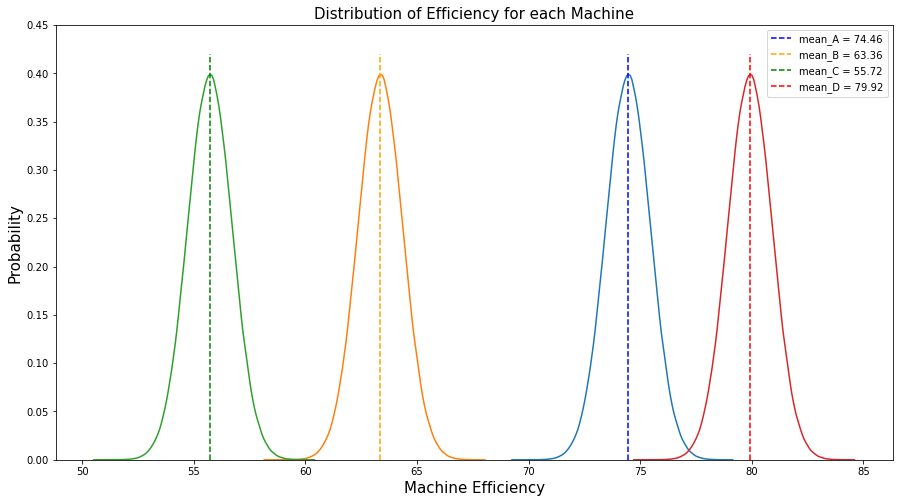

In [47]:
# consider a random variable 'X_A' that follows a normal distribution with mean efficiency of machine A 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_A = stats.norm.rvs(loc = np.mean(A), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_A, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [np.mean(A), np.mean(A)], [0, 0.42]
plt.plot(x, y, color = 'blue', linestyle = '--', label = 'mean_A = ' + str(round(np.mean(A),2)))

# set the legend
plt.legend()

# consider a random variable 'X_B' that follows a normal distribution with mean efficiency of machine B
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_B = stats.norm.rvs(loc = np.mean(B), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_B, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [np.mean(B), np.mean(B)], [0, 0.42]
plt.plot(x, y, color = 'orange', linestyle = '--', label = 'mean_B = ' + str(round(np.mean(B),2)))

# set the legend
plt.legend()

# consider a random variable 'X_C' that follows a normal distribution with mean efficiency of machine C
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_C = stats.norm.rvs(loc = np.mean(C), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_C, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [np.mean(C), np.mean(C)], [0, 0.42]
plt.plot(x, y, color = 'green', linestyle = '--', label = 'mean_C = ' + str(round(np.mean(C),2)))

# set the legend
plt.legend()

# consider a random variable 'X_D' that follows a normal distribution with mean efficiency of machine D
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_D = stats.norm.rvs(loc = np.mean(D), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_D, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [np.mean(D), np.mean(D)], [0, 0.42]
plt.plot(x, y, color = 'red', linestyle = '--', label = 'mean_D = ' + str(round(np.mean(D),2)))

# set the legend
plt.legend()

# set the limit for y-axis
plt.ylim(0, 0.45)

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Machine Efficiency', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Distribution of Efficiency for each Machine', fontsize = 15)

# display the plot
plt.show()

We can see that the sample means for each machine are not significantly close to each other, which suggests that the null hypothesis is not true (i.e. the average efficiency of at least one machine is different).

#### Perform ANOVA to test the equality of means.

Let us check the normality of the tensile strength of all the machines.

In [48]:
# create a dataframe using a dictionary from given data
df_machine = pd.DataFrame(data = {'machine': ['machine_A','machine_B','machine_C','machine_D']*5, 
                                  'strength': [68.7, 62.7, 55.9, 80.7, 75.4, 68.5, 56.1, 70.3, 70.9, 63.1, 57.3, 80.9, 79.1, 
                                               62.2, 59.2, 85.4, 78.2, 60.3, 50.1, 82.3]})

In [49]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the tensile strengths due to each machine
stat, p_value = stats.shapiro(df_machine['strength'])

# print the p-values for each group
print('p-value:', p_value)

p-value: 0.3721875548362732


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the tensile strengths due to all the machines are normally distributed. Thus the assumption of normality is satisfied.

Let us check the equality of variances.

In [50]:
# perform Levene's test for the equality of variances 
# levene() returns a tuple having the values of test statistics and the corresponding p-value
# pass the tensile strengths of each machine
stat, p_value = stats.levene(df_machine[df_machine['machine'] == 'machine_A']['strength'],
                             df_machine[df_machine['machine'] == 'machine_B']['strength'],
                             df_machine[df_machine['machine'] == 'machine_C']['strength'],
                             df_machine[df_machine['machine'] == 'machine_D']['strength'])

# print the p-value 
print('P-Value:', p_value)

P-Value: 0.7570021212992085


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal for all the samples.

Here t (=number of machines) = 4, N (=total observations) = 20 

For ⍺ = 0.05 and degrees of freedom = (t-1, N-t) = (3, 16), calculate the critical value.

In [51]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom (= 3) to the parameter 'dfn' 
# pass the degrees of freedom (= 16) to the parameter 'dfd' 
# use 'round()' to round-off the value to 4 digits
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 3, dfd = 16), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 3.2389


i.e. if the test statistic value is greater than 3.2389 then we reject the null hypothesis.

In [52]:
# perform one-way ANOVA
# pass the given data
test_stat, p_val = stats.f_oneway(df_machine[df_machine['machine'] == 'machine_A']['strength'],
                                  df_machine[df_machine['machine'] == 'machine_B']['strength'],
                                  df_machine[df_machine['machine'] == 'machine_C']['strength'],
                                  df_machine[df_machine['machine'] == 'machine_D']['strength'])

# print the test statistic and p-value
print('Test statistic:', test_stat)
print('p_value:', p_val)

Test statistic: 32.03072350199285
p_value: 5.375613532781072e-07


The above output shows that the test statistic is greater than 3.2389 and the p-value is less than 0.05. Thus we reject the null hypothesis and conclude that the average tensile strength due to at least one machine is different.

<a id="post-hoc"></a>
## 3.1 Post-hoc Analysis

If one-way ANOVA rejects the null hypothesis; we conclude that at least one treatment has a different mean. The test does not distinguish a treatment with the different average value. The post-hoc test or `multi comparison test` is used to identify such treatment(s).

In this section, we study the `Tukey's HSD` test. The test calculates the mean difference for each pair of treatments and returns the pair(s) with different average. 

The test statistic of Tukey's HSD test is given as:
<p style='text-indent:28em'> <strong> $T_{\alpha} = q_{{\alpha},(t , f)} \sqrt{\frac{MSE}{n}} $</strong></p>

The value of $q_{{\alpha},(t , f)}$ is obtained from the tukey table.<br>
Where,<br>
t: Number of treatments<br>
f: degrees of freedom for error ($df_{e}$)<br>
MSE: Mean error sum of squares (= $\frac{ESS}{df_{e}}$ = $\sum_{i}^{t}\sum_{j}^{n_{i}}{(x_{ij} - \bar{x_{i}}.)}^{2}$)<br>
n: Number of observations in a treatment

This test is efficient when the sample size for each treatment is equal. If the sample size is not equal fo each treatment then we can use the `Scheffe test`. The `scikit_posthocs.posthoc_scheffe()` can be used to perform the test.

### Example:

#### 1. Ryan is a production manager at an industry manufacturing alloy seals. They have 4 machines - A, B, C and D. Ryan wants to study whether all the machines have equal efficiency. Ryan collects data of tensile strength from all the 4 machines as given. Perform the post-hoc test to find out which machine has a different average. Test at 5% level of significance.

<img src='1_ANOVA.png'>

In [53]:
# create a dataframe using a dictionary from given data
df_machine = pd.DataFrame(data = {'machine': ['machine_A','machine_B','machine_C','machine_D']*5, 
                                  'strength': [68.7, 62.7, 55.9, 80.7, 75.4, 68.5, 56.1, 70.3, 70.9, 63.1, 57.3, 80.9, 79.1, 
                                               62.2, 59.2, 85.4, 78.2, 60.3, 50.1, 82.3]})

In [54]:
# perform tukey's range test to compare the mean efficiency for pair of machines
# pass the tensile strength to the parameter, 'data'
# pass the name of the machine to the parameter, 'groups'
comp = mc.MultiComparison(data = df_machine['strength'], groups = df_machine['machine'])

# tukey's range test
post_hoc = comp.tukeyhsd()

# print the summary table
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
machine_A,machine_B,-11.1,0.0044,-18.8842,-3.3158,True
machine_A,machine_C,-18.74,0.001,-26.5242,-10.9558,True
machine_A,machine_D,5.46,0.2265,-2.3242,13.2442,False
machine_B,machine_C,-7.64,0.0553,-15.4242,0.1442,False
machine_B,machine_D,16.56,0.001,8.7758,24.3442,True
machine_C,machine_D,24.2,0.001,16.4158,31.9842,True


The `reject=False` for pairs (machine_A, machine_D) and (machine_B, machine_C) denotes that we fail to reject the null hypothesis; and conclude that the average tensile strength due to machine_A and machine_D, machine_B and machine_C is same.

For the pairs (machine_A, machine_B), (machine_A, machine_C), (machine_B, machine_D), and (machine_C, machine_D) the average tensile strength is not the same.

The values in the columns `lower` and `upper` represent the lower and upper bound of the 95% confidence interval for the mean difference. 

<a id="non-para"></a>
# 4. Equivalent Non-parametric Test

If one of the assumptions of one-way ANOVA is not satisfied, then we can perform the `Kruskal-Wallis H test` which is a non-parametric equivalent test for one-way ANOVA.

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all treatments are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one treatment has a different average. </strong></p>

Consider there are `t` treatments each with $n_{i}$ (i = 1,2,...,t) observations  and `n` be the number of total observations. The test statistic is given as:
<p style='text-indent:28em'> <strong> $H = \frac{12}{n(n+1)} \sum_{i}{\frac{R_{i}^{2}}{n_{i}} - 3(n+1)} $</strong></p>

Where $R_{i}$ sum of the ranks of observations in the $i^{th}$ treatment.

Under $H_{0}$, the test statistic follows Chi-square distribution with ($t-1$) degrees of freedom.

### Example:

#### 1. A gym trainer wants to provide an energy bar to all his customers to increase muscle strength. Three different companies approached the gym trainer with their high-quality energy bars. The trainer collects an amount of calcium (in g) in the energy bar from three companies and he wants to study whether all the bars have an equal amount of calcium on average. Test at 5% level of significance.

given data:
           
           alpha_bar = [24.4, 20.7, 56.9, 19.5]
           beta_bar = [53.2, 54.7, 20.5, 15.8, 56.6]
           gamma_bar = [54, 31, 22.8, 24.7]

The null and alternative hypothesis is:

H<sub>0</sub>: The average amount of calcium in all the energy bars is same<br>
H<sub>1</sub>: At least one energy bar has a different average amount of calcium 

In [55]:
# given data
# amount of calcium in alpha_bar
alpha_bar = [24.4, 20.7, 56.9, 19.5]

# amount of calcium in beta_bar
beta_bar = [53.2, 54.7, 20.5, 15.8, 56.6]

# amount of calcium in gamma_bar
gamma_bar = [54, 31, 22.8, 24.7]

# create an empty list to include the amount of calcium for all energy bars
cal_amt = []

# use 'extend()' to add the data in the list
cal_amt.extend(alpha_bar)
cal_amt.extend(beta_bar)
cal_amt.extend(gamma_bar)

# print the data
cal_amt

[24.4, 20.7, 56.9, 19.5, 53.2, 54.7, 20.5, 15.8, 56.6, 54, 31, 22.8, 24.7]

Let us check the normality of the amount of calcium in the energy bars.

In [56]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the calcium in each of the energy bar
stat, p_value = stats.shapiro(cal_amt)

# print the p-value
print('p-value:', p_value)

p-value: 0.0048474338836967945


From the above result, we can see that the p-value is less than 0.05, thus we can say that the calcium amount in the energy bars is not normally distributed. This does not satisfy the assumption of normality for ANOVA.

Thus we can not apply one-way ANOVA to test the equality of the amount of calcium. Let us use the non-parametric equivalent `Kruskal-Wallis H test`.

For ⍺ = 0.05 and degrees of freedom (=3 - 1) = 2, calculate the critical value.

In [57]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 5.9915


i.e. if the chi-square value is greater than 5.9915 then we reject the null hypothesis.

In [58]:
# perform kruskal-wallis H test
test_stat, p_val = stats.kruskal(alpha_bar, beta_bar, gamma_bar)

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_val)

Test statistic: 0.22747252747252844
p-value: 0.8924933076960211


The above output shows that the test statistic value is less than 5.9915, the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and conclude that the average amount of calcium in all the energy bars is the same.

Let us plot the acceptance and rejection region for a test with 95% confidence.

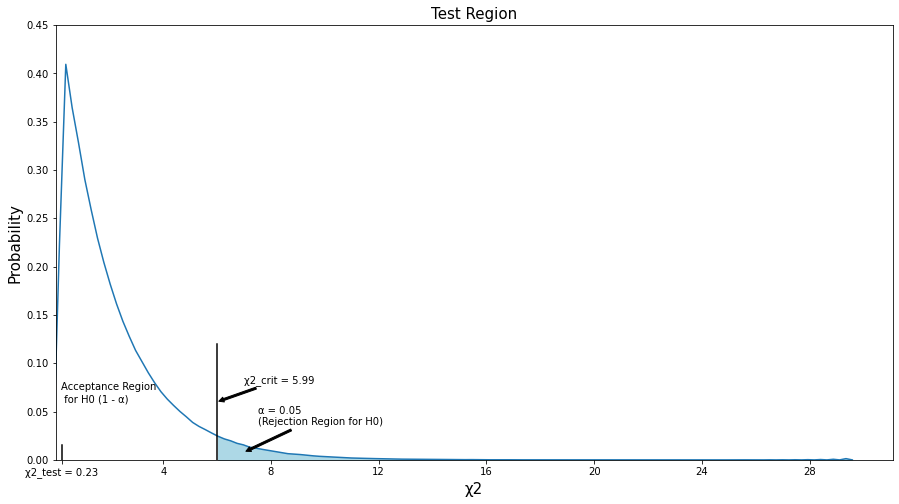

In [59]:
# consider a random variable 'X' that follows a chi-square distribution 
# pass the degrees of freedom to the parameter 'df' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.chi2.rvs(df = 2, size = 1000000, random_state = 10)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.45)

# set the left side limit for x-axis
plt.xlim(0)

# use 'stats.chi2.isf()' to calculate the critical value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom to the parameter 'df' 
chi2 = stats.chi2.isf(q = 0.05, df = 2)

# plot a vertical line at χ2-value
x, y = [chi2, chi2], [0, 0.12]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2 test value
x, y = [test_stat, test_stat], [0, 0.015]
plt.plot(x, y, color = 'black')

# add the color to the right of the χ2-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical χ2-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= chi2], y1[x1 >= chi2], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (7, 0.008), xytext = (7.5, 0.036), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'χ2_crit = '+ str(round(chi2,2)), xy = (chi2, 0.06), xytext = (chi2+1, 0.08), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 0.2, y = 0.06, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [4, 8, 12, 16, 20, 24, 28, round(test_stat,2)], 
           labels = [4, 8, 12, 16, 20, 24, 28, 'χ2_test = '+str(round(test_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('χ2', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, which implies that we fail to reject $H_{0}$.

#### 2. Ryan is a production manager at an industry manufacturing alloy seals. They have 3 machines - A, B and C. Ryan want to study whether all the machines have equal efficiency. There no information about the tensile strength of the population. Can it be said that the machines produce the sample tensile strength? Test at 5% level of significance.

<img src='KW_test.png'>

The null and alternative hypothesis is:

H<sub>0</sub>: The average tensile strength due to all the machines is the same<br>
H<sub>1</sub>: The average tensile strength due to at least one machine is different

In [60]:
# given data
# tensile strength due to machine A
machine_A = [72.5, 84.8, 76.6, 34.7]

# tensile strength due to machine B
machine_B = [33.2, 23.4, 35.7, 33.7, 34.5]

# tensile strength due to machine C
machine_C = [24.5, 34.6]

# create an empty list to include tensile strength due to all the machines
strength_machine = []

# use 'extend()' to add the data in the list
strength_machine.extend(machine_A)
strength_machine.extend(machine_B)
strength_machine.extend(machine_C)

# print the data
print(strength_machine)

[72.5, 84.8, 76.6, 34.7, 33.2, 23.4, 35.7, 33.7, 34.5, 24.5, 34.6]


Let us check the normality of the tensile strength due to all the machines.

In [61]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the tensile strength due to all machines 
stat, p_value = stats.shapiro(strength_machine)

# print the p-value
print('p-value:', p_value)

p-value: 0.0024516438134014606


From the above result, we can see that the p-value is less than 0.05, thus we can say that the tensile strength is not normally distributed. This does not satisfy the assumption of normality for ANOVA.

Thus we can not apply one-way ANOVA to test the equality of tensile strength. Let us use the non-parametric equivalent `Kruskal-Wallis H test`.

For ⍺ = 0.05 and degrees of freedom (= 3 - 1) = 2, calculate the critical value.

In [62]:
# calculate the χ2-value for 95% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter 'df' 
# use 'round()' to round-off the value to 4 digits
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 5.9915


i.e. if the chi-square value is greater than 5.9915 then we reject the null hypothesis.

In [63]:
# perform kruskal-wallis H test
test_stat, p_val = stats.kruskal(machine_A, machine_B, machine_C)

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_val)

Test statistic: 6.040909090909089
p-value: 0.04877904103071468


The above output shows that the test statistic is greater than 5.9915, the p-value is less than 0.05. Thus we reject the null hypothesis and conclude that the average tensile strength due to at least one machine is different.

If Kruskal-Wallis H test rejects the null hypothesis; we conclude that at least one treatment has a different mean. The test does not distinguish a treatment with the different average value. The post-hoc test is used to identify such treatment(s). Thus we use the `conover test` as a post-hoc test.

In [64]:
# given data
# tensile strength due to machine A
machine_A = [72.5, 84.8, 76.6, 34.7]

# tensile strength due to machine B
machine_B = [33.2, 23.4, 35.7, 33.7, 34.5]

# tensile strength due to machine C
machine_C = [24.5, 34.6]

In [65]:
# create a dataframe using a dictionary from given data
df_machine = pd.DataFrame(data = {'machine': ['machine_A', 'machine_A', 'machine_A', 'machine_A', 'machine_B', 'machine_B', 
                                              'machine_B', 'machine_B', 'machine_B', 'machine_C', 'machine_C'], 
                                  'strength': [72.5, 84.8, 76.6, 34.7, 33.2, 23.4, 35.7, 33.7, 34.5, 24.5, 34.6]})

In [66]:
# perform the conover test
# pass the dataframe to the parameter, 'a'
# pass the column with numeric data to the parameter, 'val_col'
# pass the column with categoric data to the parameter, 'group_col'
scikit_posthocs.posthoc_conover(a = df_machine, val_col = 'strength', group_col = 'machine')

,machine_A,machine_B,machine_C
machine_A,1.000000,0.012120,0.031704
machine_B,0.012120,1.000000,0.920917
machine_C,0.031704,0.920917,1.000000


For α = 0.05, the p-value for pairs (A, B) and (A, C) is less than 0.05. Thus we can conclude that there is a difference in the in the strengths between pairs of machines (A,B) and (A,C).

<a id="2way"></a>
# 5. Two-way ANOVA

The two-way ANOVA can be used to test the effect due to the two nominal variables on a numeric variable. The levels of one nominal variable is considered as `treatments` and levels of another variable is considered as `blocks`. The hypothesis can be given in terms of both the treatments and blocks. 

One of the null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{01}$: The averages of all treatments are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{11}$: At least one treatment has a different average. </strong></p>

Another null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{02}$: The averages of all blocks are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{12}$: At least one block has a different average. </strong></p>

Consider there are `t` treatments, `b` blocks and `N` is the number of total observations. 

The test statistic for `treatments` is given as:
<p style='text-indent:28em'> <strong> $F_{Tr} = \frac{MTrSS}{MESS} $</strong></p>

Where,<br>
MTrSS = $\frac{TrSS}{df_{Tr}}$<br>

TrSS = $\sum_{i}^{t}b{(\bar{x}_{i.} - \bar{x}_{..})}^{2}$<br> $b$ is the number of observations in $i_{th}$ treatment. <br>$\bar{x}_{i.}$ is the mean over $i^{th}$ treatment <br> $\bar{x}_{..}$ is the grand mean (i.e. mean of all the observations). <br>

$df_{Tr}$ is the degrees of freedom for treatments (= $t-1$)

MESS = $\frac{ESS}{df_{e}}$<br>

ESS = $\sum_{i}^{t}\sum_{j}^{b}{(x_{ij} - \bar{x}_{i.} - \bar{x}_{.j} + \bar{x}_{..})}^{2}$

$df_{e}$ is the degrees of freedom for error (= $(t-1)(b-1)$)

Under $H_{0}$, the test statistic ($F_{Tr}$) follows F-distribution with ($t-1, (t-1)(b-1)$) degrees of freedom.


The test statistic for `blocks` is given as:
<p style='text-indent:28em'> <strong> $F_{B} = \frac{MBSS}{MESS} $</strong></p>

Where,<br>
MBSS = $\frac{BSS}{df_{B}}$<br>

BSS = $\sum_{j}^{b}t(\bar{x}_{.j} - \bar{x}..)$<br>  $t$ is the number of observations in $j_{th}$ block.  $\bar{x}_{.j}$ is the mean over $j^{th}$ block <br> $\bar{x}_{..}$ is the grand mean (i.e. mean of all the observations). <br>

$df_{B}$ is the degrees of freedom for blocks (= $b-1$)

MESS = $\frac{ESS}{df_{e}}$<br>

ESS = $\sum_{i}^{t}\sum_{j}^{b}{(x_{ij} - \bar{x}_{i.} - \bar{x_{.j}} + \bar{x}_{..})}^{2}$

$df_{e}$ is the degrees of freedom for error (= $(t-1)(b-1)$)

Under $H_{0}$, the test statistic ($F_{B}$) follows F-distribution with ($b-1, (t-1)(b-1)$) degrees of freedom.

### Example:

#### 1. Check if there is any effect of level of education and completion of test preparation course on the total marks. Perform two-way ANOVA with 5% level of significance.

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [67]:
# read the students performance data 
df_student = pd.read_csv('students_data.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning


The null and alternative hypothesis for the level of education is:

H<sub>0</sub>: The average score for all the education levels is the same<br>
H<sub>1</sub>: At least one education level has a different average score

The null and alternative hypothesis for completion of test preparation course is:

H<sub>0</sub>: The average score for all the course preparation levels is the same<br>
H<sub>1</sub>: At least one course preparation level has a different average score

Let us check the normality of the total marks of students from all the treatments and blocks.

In [68]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total marks of students 
stat, p_value = stats.shapiro(df_student['total_score'])

# print the p-value
print('p-value:', p_value)

p-value: 0.7420849204063416


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the total marks of students from all the treatments and blocks are normally distributed. Thus the assumption of normality is satisfied.

In [69]:
# obtain number of unique education levels (treatments)
t = df_student['education'].nunique()
print('t:', t)

# obtain number of unique test preparation course levels (blocks)
b = df_student['test_prep_course'].nunique()
print('b:', b)

# calculate the number of students in each education level
# consider the total number of students in all education levels
N = df_student['education'].value_counts().sum()
print('N:', N)

t: 6
b: 2
N: 1000


For ⍺ = 0.05 and degrees of freedom for treatment $df_{Tr}$ (= t-1, (t-1)(b-1)) = (5, 5), calculate the critical value.

In [70]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom (= 5) to the parameter 'dfn' 
# pass the degrees of freedom (= 5) to the parameter 'dfd' 
# use 'round()' to round-off the value to 4 digits
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 5, dfd = 5), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 5.0503


i.e. if the test statistic value for treatment (i.e. education) is greater than 5.0503 then we reject the null hypothesis for treatments.

For ⍺ = 0.05 and degrees of freedom for block $df_{B}$ (= b-1, (t-1)(b-1)) = (1, 5), calculate the critical value.

In [71]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom (= 1) to the parameter 'dfn' 
# pass the degrees of freedom (= 5) to the parameter 'dfd' 
# use 'round()' to round-off the value to 4 digits
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 1, dfd = 5), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 6.6079


i.e. if the test statistic value for block (i.e. test_prep_course) is greater than 6.6079 then we reject the null hypothesis for blocks.

In [72]:
# perform two-way ANOVA

# fit an ols model on the dataframe 'df_student' 
# use 'Q()' to quote the variable name 
# use 'fit()' to fit the linear model
test = ols('total_score ~ Q("education") + Q("test_prep_course")', df_student).fit()

# create table for 2-way ANOVA test
# pass the linear model 'test'
# 'typ = 2' performs two-way ANOVA
anova_2 = anova_lm(test, typ = 2)

# print the table
anova_2

,sum_sq,df,F,PR(>F)
"Q(""education"")",2409.132920,5.0,0.895306,0.483476
"Q(""test_prep_course"")",862.925299,1.0,1.603444,0.205713
Residual,534402.603903,993.0,NaN,NaN


The above output shows that the test statistic for treatments (i.e. education) is less than 5.0503 and the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis for treatments and conclude that the average score for all the education levels (i.e. treatments) is the same.

The test statistic for blocks (i.e. test_prep_course) is less than 6.6079 and the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis for blocks and conclude that the average score for all the preparation course levels (i.e. blocks) is the same.

Let us plot the acceptance and rejection region for a test with 95% confidence.

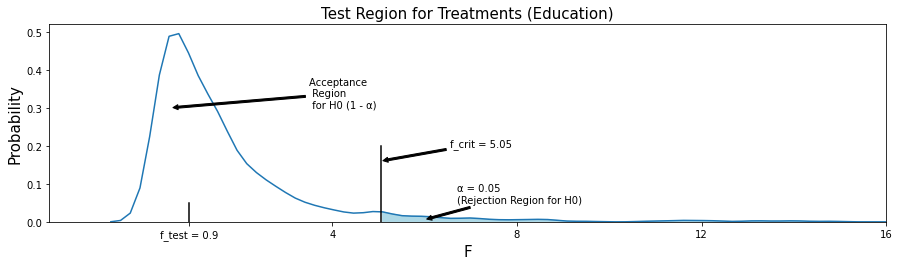

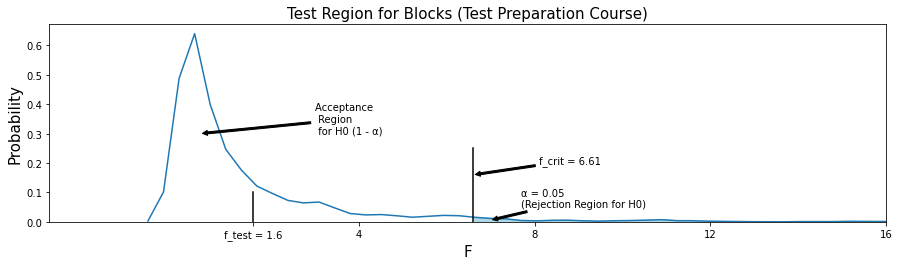

In [73]:
# plot the F-distribution for treatments

plt.subplot(2,1,1)

# consider a random variable 'X' that follows a F distribution 
# pass the degrees of freedom (= 5) to the parameter 'dfn' 
# pass the degrees of freedom (= 5) to the parameter 'dfd' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.f.rvs(dfn = 5, dfd = 5, size = 1000, random_state = 12)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0)
plt.xlim(right = 16)

# use 'stats.f.isf()' to calculate the critical value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom (= 5) to the parameter 'dfn' 
# pass the degrees of freedom (= 5) to the parameter 'dfd' 
f = stats.f.isf(q = 0.05, dfn = 5, dfd = 5)

# plot a vertical line at f-value
x, y = [f, f], [0, 0.2]
plt.plot(x, y, color = 'black')

# plot a vertical line at f test value for 'education'
x, y = [0.8953, 0.8953], [0, 0.05]
plt.plot(x, y, color = 'black')

# add the color to the right of the f-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical f-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= f], y1[x1 >= f], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (6, 0.006), xytext = (6.7, 0.05), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'f_crit = '+ str(round(f,2)), xy = (f, 0.16), xytext = (f+1.5, 0.2), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'Acceptance \n Region \n for H0 (1 - α)', xy = (0.5, 0.3), xytext = (3.5, 0.3), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [4, 8, 12, 16, round(0.8953,2)], 
           labels = [4, 8, 12, 16, 'f_test = '+str(round(0.8953,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('F', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region for Treatments (Education)', fontsize = 15)

# display the plot
plt.show()


# plot the F-distribution for blocks
plt.subplot(2,1,2)

# consider a random variable 'X' that follows a F distribution 
# pass the degrees of freedom (= 1) to the parameter 'dfn' 
# pass the degrees of freedom (= 5) to the parameter 'dfd' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.f.rvs(dfn = 1, dfd = 5, size = 2000, random_state = 5)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0)

plt.xlim(right = 16)

# use 'stats.f.isf()' to calculate the critical value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom (= 1) to the parameter 'dfn' 
# pass the degrees of freedom (= 5) to the parameter 'dfd' 
f = stats.f.isf(q = 0.05, dfn = 1, dfd = 5)

# plot a vertical line at f-value
x, y = [f, f], [0, 0.25]
plt.plot(x, y, color = 'black')

# plot a vertical line at f test value for 'test_prep_course'
x, y = [1.6034, 1.6034], [0, 0.1]
plt.plot(x, y, color = 'black')

# add the color to the right of the f-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical f-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= f], y1[x1 >= f], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (7, 0.006), xytext = (7.7, 0.05), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'f_crit = '+ str(round(f,2)), xy = (f, 0.16), xytext = (f+1.5, 0.2), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'Acceptance \n Region \n for H0 (1 - α)', xy = (0.4, 0.3), xytext = (3, 0.3), 
            arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [4, 8, 12, 16, round(1.6034,2)], 
          labels = [4, 8, 12, 16, 'f_test = '+str(round(1.6034,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('F', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region for Blocks (Test Preparation Course)', fontsize = 15)

# display the plot
plt.show()

The above plot shows that for both the distributions the test statistic values are in the acceptance region, which implies that we fail to reject (i.e. accept) $H_{0}$.

#### 2. The business is thriving, and Ryan finds it crucial that the production should progress without any breaks. He decides to have three shifts - Morning, Afternoon and Night shift. Ryan collects data of tensile strength from all the 4 machines and the 3 shifts as given. Test at 5% level of significance.

<img src='2_ANOVA.png'>

The null and alternative hypothesis for machines is:

H<sub>0</sub>: The average tensile strength due to all the machines is the same<br>
H<sub>1</sub>: The average tensile strength is different for at least one machine 

The null and alternative hypothesis for shifts is:

H<sub>0</sub>: The average tensile strength due to all the shifts is the same<br>
H<sub>1</sub>: The average tensile strength is different for at least one shift 

In [74]:
# read the excel file containing data
df_machine_shift = pd.read_excel('2_way_ANOVA.xlsx')

# print the first five observations
df_machine_shift.head()

,Machine,Shift,Tensile_Strength
0,A,MS,68.7
1,A,AS,75.4
2,A,NS,80.9
3,B,MS,78.7
4,B,AS,75.4


Let us check the normality of the tensile strength due to all machines and shifts.

In [75]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total marks of students 
stat, p_value = stats.shapiro(df_machine_shift['Tensile_Strength'])

# print the p-value
print('p-value:', p_value)

p-value: 0.059956591576337814


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the tensile strength due to all the machines and shifts is normally distributed. Thus the assumption of normality is satisfied.

In [76]:
# number of machines (treatments)
t = df_machine_shift['Machine'].nunique()
print('t:', t)

# number of shifts (blocks)
b = df_machine_shift['Shift'].nunique()
print('b:', b)

# total number of observations
N = len(df_machine_shift)
print('N:', N)

t: 4
b: 3
N: 12


For ⍺ = 0.05 and degrees of freedom for treatment $df_{Tr}$ (= t-1, (t-1)(b-1)) = (3, 6), calculate the critical value.

In [77]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom (= 3) to the parameter 'dfn' 
# pass the degrees of freedom (= 6) to the parameter 'dfd' 
# use 'round()' to round-off the value to 4 digits
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 3, dfd = 6), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 4.7571


i.e. if the test statistic value for treatment (i.e. machine) is greater than 4.7571 then we reject the null hypothesis for treatments.

For ⍺ = 0.05 and degrees of freedom for block $df_{B}$ (= b-1, (t-1)(b-1)) = (2, 6), calculate the critical value.

In [78]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom (= 2) to the parameter 'dfn' 
# pass the degrees of freedom (= 6) to the parameter 'dfd' 
# use 'round()' to round-off the value to 4 digits
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 2, dfd = 6), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 5.1433


i.e. if the test statistic value for the block (i.e. shift) is greater than 5.1433 then we reject the null hypothesis for blocks.

In [79]:
# perform two-way ANOVA

# fit an ols model on the dataframe 
# use 'Q()' to quote the variable name 
# use 'fit()' to fit the linear model
test = ols('Tensile_Strength ~ Q("Machine") + Q("Shift")', df_machine_shift).fit()

# create table for 2-way ANOVA test
# pass the linear model 'test'
# 'typ = 2' performs two-way ANOVA
anova_2 = anova_lm(test, typ = 2)

# print the table
anova_2

,sum_sq,df,F,PR(>F)
"Q(""Machine"")",1414.646667,3.0,60.052922,0.000072
"Q(""Shift"")",49.806667,2.0,3.171501,0.114866
Residual,47.113333,6.0,NaN,NaN


The above output shows that the test statistic for treatments (i.e. machines) is greater than 4.7571 and the p-value is less than 0.05. Thus we reject the null hypothesis for treatments and conclude that the average tensile strength due to at least one machine is different.

The test statistic for blocks (i.e. shift) is less than 5.1433 and the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis for blocks and conclude that the average tensile strength due to all the shifts is the same.